<a href="https://colab.research.google.com/github/faisu6339-glitch/Machine-learning/blob/main/Principle_Component_(PCA2)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)

df = pd.DataFrame(class1_sample,columns=['feature1','feature2','feature3'])
df['target'] = 1


In [4]:
mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)

df1 = pd.DataFrame(class2_sample,columns=['feature1','feature2','feature3'])

df1['target'] = 0

df = pd.concat([df, df1], ignore_index=True)

df = df.sample(40)

In [5]:
df.head()

,feature1,feature2,feature3,target
28,0.796870,0.989438,0.912755,0
36,2.419858,1.009512,1.486742,0
17,-1.532119,1.343307,-0.262062,1
12,-1.833006,-2.827546,-0.197377,1
39,0.776109,0.234064,0.233303,0


In [6]:
import plotly.express as px
#y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=df['feature1'], y=df['feature2'], z=df['feature3'],
              color=df['target'].astype('str'))
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()

In [7]:
# Step 1 - Apply standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df.iloc[:,0:3] = scaler.fit_transform(df.iloc[:,0:3])

In [8]:
# Step 2 - Find Covariance Matrix
covariance_matrix = np.cov([df.iloc[:,0],df.iloc[:,1],df.iloc[:,2]])
print('Covariance Matrix:\n', covariance_matrix)

Covariance Matrix:
 [[1.02564103 0.34302718 0.20400588]
 [0.34302718 1.02564103 0.05893617]
 [0.20400588 0.05893617 1.02564103]]


In [9]:
# Step 3 - Finding EV and EVs
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)


eigen_values

array([1.45236094, 0.65044133, 0.97412081])

In [21]:
eigen_vectors

array([[ 0.68245223,  0.72730134, -0.07274416],
       [ 0.6052094 , -0.61806964, -0.50170859],
       [ 0.40985429, -0.29836669,  0.86197261]])

In [10]:
%pylab inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch

Populating the interactive namespace from numpy and matplotlib


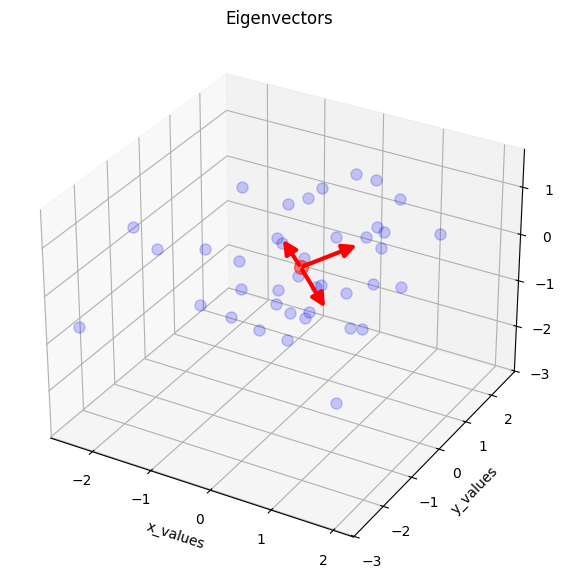

In [16]:
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, ax, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs
        self.ax = ax

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.ax.get_proj())
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

    def do_3d_projection(self, renderer=None):
        # For a simple arrow, calculate the average depth of its start and end points
        # to assist in correct 3D rendering order.
        x3d, y3d, z3d = self._verts3d
        return (z3d[0] + z3d[1]) / 2

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(df['feature1'], df['feature2'], df['feature3'], 'o', markersize=8, color='blue', alpha=0.2)
ax.plot([df['feature1'].mean()], [df['feature2'].mean()], [df['feature3'].mean()], 'o', markersize=10, color='red', alpha=0.5)
for v in eigen_vectors.T:
    a = Arrow3D([df['feature1'].mean(), v[0]], [df['feature2'].mean(), v[1]], [df['feature3'].mean(), v[2]], ax, mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

In [17]:
pc = eigen_vectors[0:2]
pc


array([[ 0.68245223,  0.72730134, -0.07274416],
       [ 0.6052094 , -0.61806964, -0.50170859]])

In [18]:

transformed_df = np.dot(df.iloc[:,0:3],pc.T)
# 40,3 - 3,2
new_df = pd.DataFrame(transformed_df,columns=['PC1','PC2'])
new_df['target'] = df['target'].values
new_df.head()

,PC1,PC2,target
0,0.574082,-0.369030,0
1,1.678697,0.319292,0
2,-0.752470,-1.363433,1
3,-3.486843,0.554811,1
4,0.156645,0.372739,0


In [20]:
new_df['target'] = new_df['target'].astype('str')
fig = px.scatter(x=new_df['PC1'],
                 y=new_df['PC2'],
                 color=new_df['target'],
                 color_discrete_sequence=px.colors.qualitative.G10
                )

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()